## __Exploración Inicial de los datos__

__Importación de librerías__

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Exploración Empresas__

In [ ]:
#Página para consultar las 500 empresas de S&P

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [ ]:
payload = pd.read_html(url)

# Hay 2 tablas en la pagina de Wikipedia. 
first_table = payload[0]
second_table = payload[1]

# En la primera tabla los datos que se quiere.


df500_table = first_table

df500_table['GICS Sub-Industry'].unique()


In [325]:
#Exploración sobre los campos dentro del Sector Health Care
a= df500_table[df500_table['GICS Sector']=='Health Care']
lista= a['GICS Sub-Industry'].unique()

In [326]:
lista

array(['Health Care Equipment', 'Pharmaceuticals', 'Health Care Supplies',
       'Health Care Distributors', 'Biotechnology',
       'Life Sciences Tools & Services', 'Managed Health Care',
       'Health Care Services', 'Health Care Facilities',
       'Health Care Technology'], dtype=object)

In [331]:
#Definimos el ticker para la consulta
simbolo ='REGN'
regeneron = yf.Ticker(simbolo)
hist= regeneron.history(period='5y')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-26 00:00:00-04:00,325.579987,331.000000,317.709991,330.709991,733600,0.0,0.0
2018-03-27 00:00:00-04:00,332.649994,335.700012,326.940002,329.239990,996300,0.0,0.0
2018-03-28 00:00:00-04:00,329.799988,340.399994,328.500000,338.480011,1037400,0.0,0.0
2018-03-29 00:00:00-04:00,340.820007,346.869995,338.320007,344.359985,1032800,0.0,0.0
2018-04-02 00:00:00-04:00,342.450012,345.489990,324.769989,330.559998,1317100,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-20 00:00:00-04:00,748.659973,760.330017,745.789978,759.250000,587800,0.0,0.0
2023-03-21 00:00:00-04:00,764.650024,765.010010,751.979980,759.760010,372100,0.0,0.0
2023-03-22 00:00:00-04:00,760.299988,764.390015,751.010010,751.299988,322900,0.0,0.0


__Definición de empresas en el subsector de biotecnología__

In [ ]:
#Juntamos las empresas del sector de biotecnología

empresas= [
    'AMGN', #Amgen 
    'BIIB', #Biogen
    'GILD', #Gilead Science
    'INCY', #Ncyte
    #'MRNA', #Moderna ##Se descarta por no cotizar durante los primeros años del periodo de interés
    'REGN', #Regeneron
    'VRTX' #Vertex
]

In [ ]:
#Definición de periodo de interés 

start_date= "2000–01–01"
end_date="2023–01–01"

In [243]:
#Extracción de información sobre el cierre de las empresas en el periodo de tiempo 
# Se opta por pedir información de 24 años y se eliminan las filas correspondientes a meses anteriores al 2000

recolector =[]

for i in empresas:
    ticker= yf.Ticker(i)
    px=ticker.history(period='24y',interval= '1mo')['Close']
    px.name= i 

    recolector += [px]

precios= pd.concat(recolector, axis= 1)

precios

,AMGN,BIIB,GILD,INCY,REGN,VRTX
Date,,,,,,
1999-04-01 00:00:00-05:00,22.825626,8.458333,1.100879,9.031250,6.625000,10.562500
1999-05-01 00:00:00-04:00,23.499014,8.406250,1.042624,13.000000,7.125000,10.031250
1999-06-01 00:00:00-04:00,22.616644,12.843750,1.248759,13.218750,7.812500,12.062500
1999-07-01 00:00:00-04:00,28.561060,16.520832,1.852226,13.312500,8.375000,12.625000
1999-08-01 00:00:00-04:00,30.906315,21.177082,1.862682,14.187500,9.500000,13.875000
...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,281.954346,305.170013,86.285896,79.669998,751.700012,316.399994
2022-12-01 00:00:00-05:00,260.344086,276.920013,84.340706,80.320000,721.489990,288.779999
2023-01-01 00:00:00-05:00,250.193588,290.899994,83.148216,85.139999,758.469971,323.100006


In [265]:
#Se eliminan las primeras 9 lineas correspondientes a 1999

precios.drop(precios.index[0:9],inplace= True)

In [266]:
precios

,AMGN,BIIB,GILD,INCY,REGN,VRTX
Date,,,,,,
2000-01-01 00:00:00-05:00,47.323105,42.062500,1.118805,54.875000,12.312500,20.500000
2000-02-01 00:00:00-05:00,50.666855,46.958332,1.828326,137.781250,56.500000,36.312500
2000-03-01 00:00:00-05:00,45.604824,32.750000,1.514643,43.718750,29.562500,23.406250
2000-04-01 00:00:00-05:00,41.610909,21.333332,1.295064,38.500000,28.562500,26.125000
2000-05-01 00:00:00-04:00,47.276661,21.270832,1.307014,26.375000,20.375000,36.937500
...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,281.954346,305.170013,86.285896,79.669998,751.700012,316.399994
2022-12-01 00:00:00-05:00,260.344086,276.920013,84.340706,80.320000,721.489990,288.779999
2023-01-01 00:00:00-05:00,250.193588,290.899994,83.148216,85.139999,758.469971,323.100006


Text(0.5, 1.0, 'Evolución Subsector Biotecnología (2020-2022)')

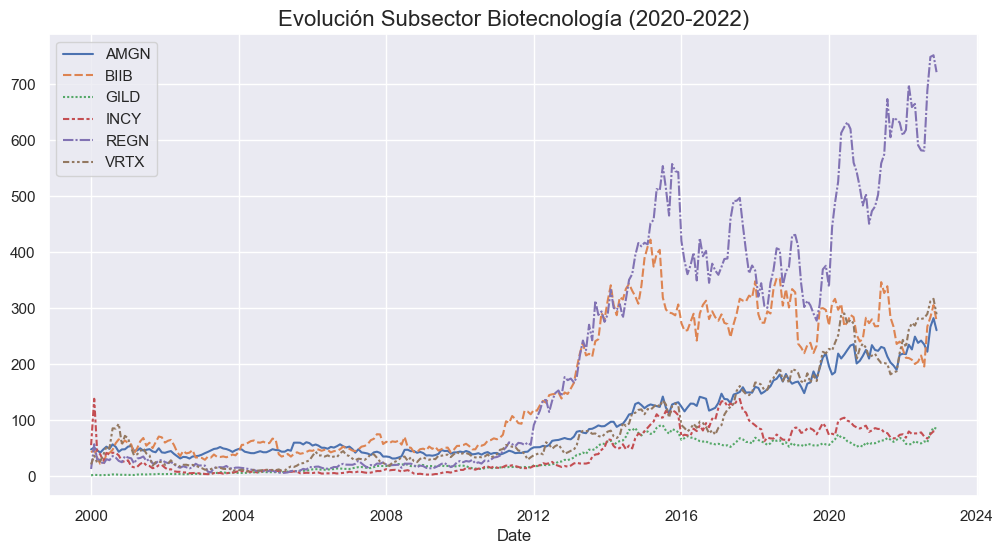

In [551]:
#Visualización de los valores de las acciones al cierre desde el 2000 a la fecha

lin=sns.lineplot(data=precios)
lin.axes.set_title("Evolución Subsector Biotecnología (2020-2022)", fontsize=16)


In [429]:
#Se eliminan los últimos meses de 2023 para poder tener años completos
precios.drop(precios.index[276:279],inplace= True)

In [430]:
precios

,AMGN,BIIB,GILD,INCY,REGN,VRTX
Date,,,,,,
2000-01-01 00:00:00-05:00,47.323105,42.062500,1.118805,54.875000,12.312500,20.500000
2000-02-01 00:00:00-05:00,50.666855,46.958332,1.828326,137.781250,56.500000,36.312500
2000-03-01 00:00:00-05:00,45.604824,32.750000,1.514643,43.718750,29.562500,23.406250
2000-04-01 00:00:00-05:00,41.610909,21.333332,1.295064,38.500000,28.562500,26.125000
2000-05-01 00:00:00-04:00,47.276661,21.270832,1.307014,26.375000,20.375000,36.937500
...,...,...,...,...,...,...
2022-08-01 00:00:00-04:00,234.756989,195.380005,61.654949,70.430000,581.059998,281.760010
2022-09-01 00:00:00-04:00,221.901230,267.000000,59.925850,66.639999,688.869995,289.540009
2022-10-01 00:00:00-04:00,266.153503,283.440002,77.080627,74.339996,748.750000,312.000000


In [555]:
##último valor y correlaciones

ult_dato= pd.DataFrame(precios.iloc[275,:])

In [559]:
ult_dato.columns=['Último Dato']

In [586]:
ult_dato.drop('New Col', inplace=True, axis=1)

In [604]:
ult_dato.to_csv('KPI_relacion.csv')

In [602]:
#popped_col = data.pop("Name")
# storing data in new var
 
#ult_dato['Porcentaje de Cambio']= por.values
#ult_dato['UPA 2022']= upa_2022.values}

ult_dato[' Último Market Cap']= (ult_MC.values/1000000)

#ult_dato['Último Market Cap']= (ult_dato['Último Market Cap']/1000000)


In [610]:
kpi.drop('Empresa', inplace=True, axis=1)
kpi

,Último Dato,Porcentaje de Cambio,UPA 2022,Último Market Cap
0,260.344086,399.080753,26.439363,14691.060549
1,276.920013,422.758820,115.684709,6502.552679
2,84.340706,3511.031962,10.183712,13341.375520
3,80.320000,63.013558,0.961763,2245.281335
4,721.489990,2100.505011,83.343003,8993.877771
5,288.779999,423.936906,25.458902,7587.261298


In [613]:
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf

In [614]:

fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 = kpi['Porcentaje de Cambio'].log       # Datos eje X
x2 = kpi['UPA 2022']                             # Datos eje Y
y = kpi['Último Dato']       

NameError: name 'pyplot' is not defined

<AxesSubplot: >

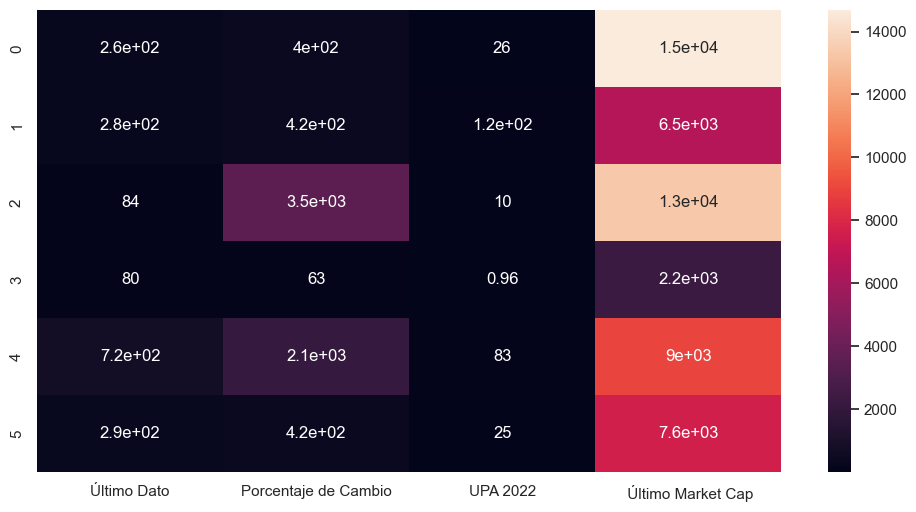

In [612]:
#relaciones correlacion

#kpi= pd.read_csv('KPI_relacion.csv')

sns.heatmap(kpi, annot= True)


__Porcentaje de cambio__

In [431]:
##División de años:
anio_2000= precios.iloc[:12,:].mean()
#anio_2= precios.iloc[9:20,:]
anio_2022= precios.iloc[264:276,:].mean()

In [451]:
anio_2022

AMGN    240.801612
BIIB    233.496670
GILD     65.365189
INCY     74.829166
REGN    659.492498
VRTX    277.215836
dtype: float64

In [574]:
anio_1=pd.DataFrame(anio_2000)
anio_2=pd.DataFrame(anio_2022)

In [575]:
crecimiento= pd.concat([anio_1,anio_2], axis=1)

In [576]:
crecimiento.shape

(18, 7)

In [454]:
crecimiento.columns=['2000', '2023']

In [572]:
crecimiento['Porcentaje de cambio']= ((crecimiento['2023']-crecimiento['2000'])/crecimiento['2000'])*100

In [459]:
crecimiento.to_csv('crecimiento.csv')

In [588]:
crec_emp= pd.read_csv('crecimiento.csv')

In [589]:
por=crec_emp.pop('Porcentaje de cambio')

In [590]:
crec_emp

,Empresa,2000,2023
0,AMGN,48.249028,240.801612
1,BIIB,44.666232,233.496670
2,GILD,1.810153,65.365189
3,INCY,45.903646,74.829166
4,REGN,29.970052,659.492498
5,VRTX,52.910156,277.215836


Text(0.5, 1.0, 'Tasa de crecimiento de las empresas de Biotecnología (2000-2022)')

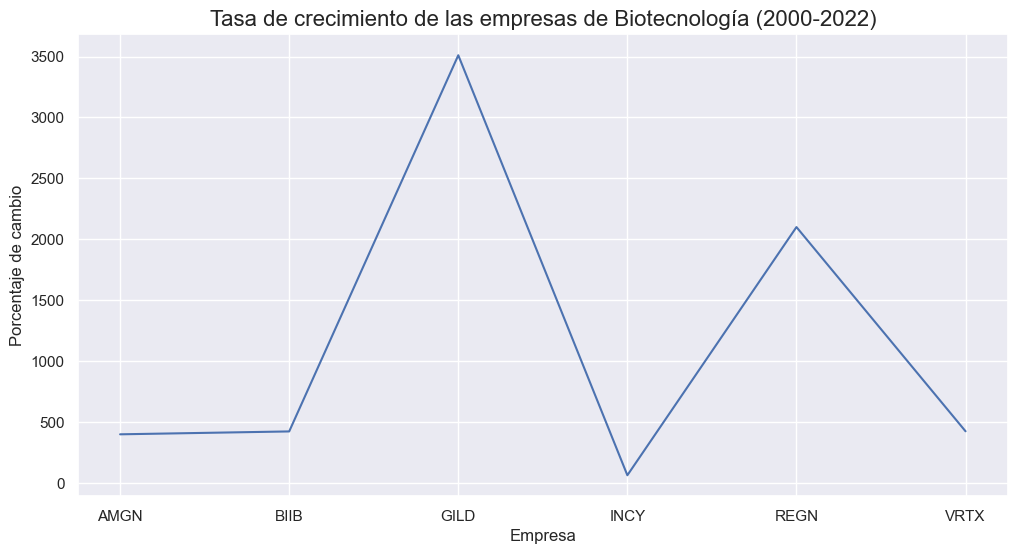

In [550]:
#Visualización de crecimiento en los últimos 20 años
lin=sns.lineplot(x='Empresa', y= 'Porcentaje de cambio', data= crec_emp)
lin.axes.set_title("Tasa de crecimiento de las empresas de Biotecnología (2000-2022)", fontsize=16)


/Users/arii/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Valor de acciones en empresas de Biotecnología(2020-2022)')

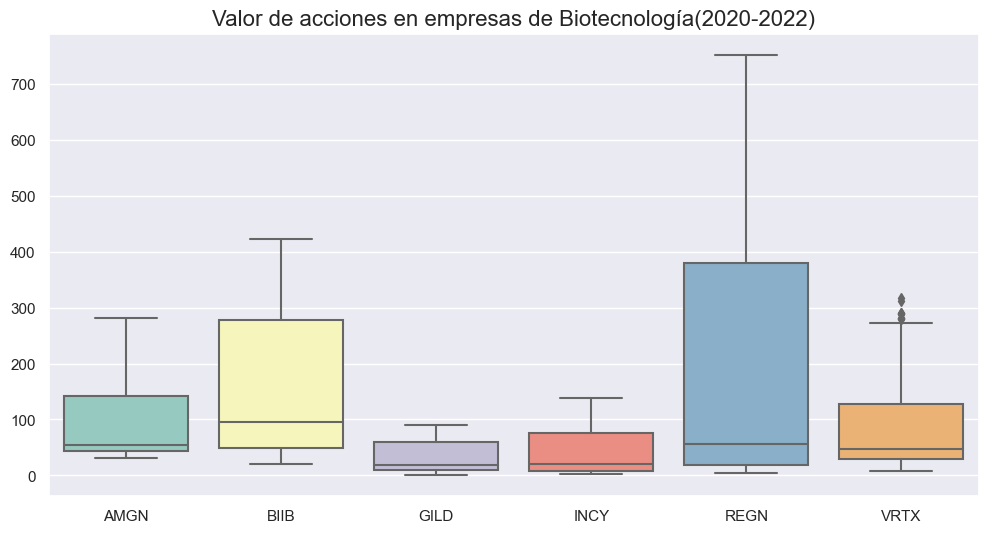

In [549]:
#Visualización de valor de las acciones al cierre en los últimos 20 años de cada empresa

boxplot=sns.boxplot(data=precios, palette= 'Set3')
boxplot.axes.set_title("Valor de acciones en empresas de Biotecnología(2020-2022)", fontsize=16)


In [224]:
#Exportación de base para pruebas en tableau
precios.to_csv('precios_close.csv')

__Cálculo de UPA (Utilidad por Acción)__

Medida que se utiliza para evaluar el desempeño y rentabilidad por acción en un periodo determinado.

In [470]:
#Extracción de información sobre el volumen de transacciones de las empresas en el periodo de tiempo 
# Se opta por pedir información de 24 años y se eliminan las filas correspondientes a meses anteriores al 2000

recolector_2 =[]

for i in empresas:
    ticker= yf.Ticker(i)
    px=ticker.history(period='24y',interval= '1mo')['Volume']
    px.name= i 

    recolector_2 += [px]

volumenes = pd.concat(recolector_2, axis= 1)

volumenes

,AMGN,BIIB,GILD,INCY,REGN,VRTX
Date,,,,,,
1999-04-01 00:00:00-05:00,249024800,53669400,243760000,20339000,1365300,9729200
1999-05-01 00:00:00-04:00,170957200,37639200,168185600,11602400,1071700,5703800
1999-06-01 00:00:00-04:00,254290200,51964200,183424000,5987600,1343200,3564400
1999-07-01 00:00:00-04:00,237813400,65609400,476678400,9199000,1333100,10472200
1999-08-01 00:00:00-04:00,202150800,71535600,587916800,6989800,1324100,15834400
...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,64904800,27706200,173745300,29157700,14471400,32626300
2022-12-01 00:00:00-05:00,56429400,23481700,158184300,27954200,12465700,26273500
2023-01-01 00:00:00-05:00,43432900,24119500,126112900,37808300,12419000,29202700


In [471]:
#Se eliminan las primeras 9 lineas correspondientes a 1999

volumenes.drop(volumenes.index[0:9],inplace= True)

In [473]:
#Se eliminan los últimos meses de 2023 para poder tener años completos
volumenes.drop(volumenes.index[276:279],inplace= True)

In [474]:
volumenes

,AMGN,BIIB,GILD,INCY,REGN,VRTX
Date,,,,,,
2000-01-01 00:00:00-05:00,249637000,85253700,808892800,41161000,3952000,13260000
2000-02-01 00:00:00-05:00,197030800,78873300,829113600,53425800,15014700,16390600
2000-03-01 00:00:00-05:00,353739500,105603300,554243200,83893600,12697000,33565400
2000-04-01 00:00:00-05:00,215305700,99102900,430595200,42900000,7410100,12064200
2000-05-01 00:00:00-04:00,147977200,56663700,415628800,39974200,2591700,22445200
...,...,...,...,...,...,...
2022-08-01 00:00:00-04:00,59009700,17168100,141440900,28638200,12450800,29784600
2022-09-01 00:00:00-04:00,56793300,44139700,177005800,28532400,20758900,29425000
2022-10-01 00:00:00-04:00,55945000,35186800,179367700,30503800,15485800,31800300


In [475]:
#volumenes de cada empresa por cada mes
volumenes.columns = ['AMGN_V', 'BIIB_V', 'GILD_V', 'INCY_V', 'REGN_V', 'VRTX_V']

In [476]:
volumenes

,AMGN_V,BIIB_V,GILD_V,INCY_V,REGN_V,VRTX_V
Date,,,,,,
2000-01-01 00:00:00-05:00,249637000,85253700,808892800,41161000,3952000,13260000
2000-02-01 00:00:00-05:00,197030800,78873300,829113600,53425800,15014700,16390600
2000-03-01 00:00:00-05:00,353739500,105603300,554243200,83893600,12697000,33565400
2000-04-01 00:00:00-05:00,215305700,99102900,430595200,42900000,7410100,12064200
2000-05-01 00:00:00-04:00,147977200,56663700,415628800,39974200,2591700,22445200
...,...,...,...,...,...,...
2022-08-01 00:00:00-04:00,59009700,17168100,141440900,28638200,12450800,29784600
2022-09-01 00:00:00-04:00,56793300,44139700,177005800,28532400,20758900,29425000
2022-10-01 00:00:00-04:00,55945000,35186800,179367700,30503800,15485800,31800300


In [477]:
#Se buscan los valores correspondientes a los 3 últimos años de las empresas para comparar sus volúmenes y calcular la UPA
anio_2022= pd.DataFrame(volumenes.iloc[267:279,:].mean())
anio_2021= pd.DataFrame(volumenes.iloc[255:267,:].mean())
anio_2020= pd.DataFrame(volumenes.iloc[243:255,:].mean())

In [478]:
vol_UPA= pd.concat([anio_2020, anio_2021, anio_2022], axis=1) 
vol_UPA

,0,0,0
AMGN_V,5.647910e+07,5.820455e+07,6.112099e+07
BIIB_V,3.186554e+07,2.992983e+07,2.633797e+07
GILD_V,2.317640e+08,1.646420e+08,1.610415e+08
INCY_V,2.833204e+07,3.419798e+07,2.959148e+07
REGN_V,2.198172e+07,1.618707e+07,1.436353e+07
VRTX_V,3.958158e+07,3.943217e+07,3.216557e+07


In [479]:
#Renombramos columnas para evitar confusiones más adelante
vol_UPA.columns = ['2020_vp', '2021_vp', '2022_vp']

In [482]:
#se exporta como csv para modificar la columna correspondiente a la empresa 
#vol_UPA.to_csv('vol_UPA.csv')
volUPA= pd.read_csv('vol_UPA.csv')

In [483]:
volUPA.head()

,Empresa,2020_vp,2021_vp,2022_vp
0,AMGN_V,5.647910e+07,5.820455e+07,6.112099e+07
1,BIIB_V,3.186554e+07,2.992983e+07,2.633797e+07
2,GILD_V,2.317640e+08,1.646420e+08,1.610415e+08
3,INCY_V,2.833204e+07,3.419798e+07,2.959148e+07
4,REGN_V,2.198172e+07,1.618707e+07,1.436353e+07


In [484]:
#Se importa csv con los valores de ingreso neto al año de todas las empresas para hacer comparaciones 
##información obtenida de : https://www.investing.com/equities
incomePYear= pd.read_csv('IncomePYear.csv')

In [485]:
incomePYear

,Empresa,2020,2021,2022
0,AMGN_V,1317.00,2143.00,1616.00
1,BIIB_V,4000.60,1556.10,3046.90
2,GILD_V,1144.00,1789.00,1640.00
3,INCY_V,161.34,112.78,28.46
4,REGN_V,852.10,1315.70,1197.10
5,VRTX_V,810.50,930.50,818.90


In [486]:
#Se concatenan las dos tablas
upa_calcul= pd.concat([volUPA, incomePYear],axis=1, ignore_index=True)

In [487]:
#Se elimina la columna repetida de "Empresa"
upa_calcul.drop(4, axis=1, inplace= True)

In [490]:
#Renombrar columnas 
upa_calcul.columns= ['Empresa', '2020_vp', '2021_vp', '2022_vp', '2020_i','2021_i', '2022_i']
upa_calcul

,Empresa,2020_vp,2021_vp,2022_vp,2020_i,2021_i,2022_i
0,AMGN_V,5.647910e+07,5.820455e+07,6.112099e+07,1317.00,2143.00,1616.00
1,BIIB_V,3.186554e+07,2.992983e+07,2.633797e+07,4000.60,1556.10,3046.90
2,GILD_V,2.317640e+08,1.646420e+08,1.610415e+08,1144.00,1789.00,1640.00
3,INCY_V,2.833204e+07,3.419798e+07,2.959148e+07,161.34,112.78,28.46
4,REGN_V,2.198172e+07,1.618707e+07,1.436353e+07,852.10,1315.70,1197.10
5,VRTX_V,3.958158e+07,3.943217e+07,3.216557e+07,810.50,930.50,818.90


In [491]:
#Se estandarizan los valores a utilizar para calcular el UPA
upa_calcul['2020_vp']= (upa_calcul['2020_vp']/1000000)
upa_calcul['2021_vp']= (upa_calcul['2021_vp']/1000000)
upa_calcul['2022_vp']= (upa_calcul['2022_vp']/1000000)

In [492]:
#Se realiza el cálculo de los UPAs para cada año y se guarda en la misma tabla 

upa_calcul['UPA_2020']= upa_calcul['2020_i']/upa_calcul['2020_vp']
upa_calcul['UPA_2021']= upa_calcul['2021_i']/upa_calcul['2021_vp']
upa_calcul['UPA_2022']= upa_calcul['2022_i']/upa_calcul['2022_vp']

In [493]:
upa_calcul

,Empresa,2020_vp,2021_vp,2022_vp,2020_i,2021_i,2022_i,UPA_2020,UPA_2021,UPA_2022
0,AMGN_V,56.479100,58.204550,61.120989,1317.00,2143.00,1616.00,23.318360,36.818427,26.439363
1,BIIB_V,31.865542,29.929833,26.337967,4000.60,1556.10,3046.90,125.546273,51.991603,115.684709
2,GILD_V,231.764000,164.642042,161.041478,1144.00,1789.00,1640.00,4.936056,10.865997,10.183712
3,INCY_V,28.332042,34.197983,29.591478,161.34,112.78,28.46,5.694613,3.297855,0.961763
4,REGN_V,21.981717,16.187067,14.363533,852.10,1315.70,1197.10,38.764033,81.280940,83.343003
5,VRTX_V,39.581575,39.432167,32.165567,810.50,930.50,818.90,20.476699,23.597486,25.458902


In [591]:
upa_2022= upa_calcul.pop('UPA_2022')

__Cálculo de Market Cap__

Medida que indica lo que una empresa vale en el mercado, así como la percepción para futuros prospectos, dado que refleja lo que los inversionistas están dispuestos a pagar por por sus acciones 


In [494]:
Market_Cap= pd.concat([precios, volumenes], axis=1)

In [495]:
Market_Cap

,AMGN,BIIB,GILD,INCY,REGN,VRTX,AMGN_V,BIIB_V,GILD_V,INCY_V,REGN_V,VRTX_V
Date,,,,,,,,,,,,
2000-01-01 00:00:00-05:00,47.323105,42.062500,1.118805,54.875000,12.312500,20.500000,249637000,85253700,808892800,41161000,3952000,13260000
2000-02-01 00:00:00-05:00,50.666855,46.958332,1.828326,137.781250,56.500000,36.312500,197030800,78873300,829113600,53425800,15014700,16390600
2000-03-01 00:00:00-05:00,45.604824,32.750000,1.514643,43.718750,29.562500,23.406250,353739500,105603300,554243200,83893600,12697000,33565400
2000-04-01 00:00:00-05:00,41.610909,21.333332,1.295064,38.500000,28.562500,26.125000,215305700,99102900,430595200,42900000,7410100,12064200
2000-05-01 00:00:00-04:00,47.276661,21.270832,1.307014,26.375000,20.375000,36.937500,147977200,56663700,415628800,39974200,2591700,22445200
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01 00:00:00-04:00,234.756989,195.380005,61.654949,70.430000,581.059998,281.760010,59009700,17168100,141440900,28638200,12450800,29784600
2022-09-01 00:00:00-04:00,221.901230,267.000000,59.925850,66.639999,688.869995,289.540009,56793300,44139700,177005800,28532400,20758900,29425000
2022-10-01 00:00:00-04:00,266.153503,283.440002,77.080627,74.339996,748.750000,312.000000,55945000,35186800,179367700,30503800,15485800,31800300


In [496]:
##Calculo de Maket Cap KPI que multiplica el valor de cierre y el volumen de acciones transaccionadas 


Market_Cap['MarketCap_AMGN']= Market_Cap['AMGN']*Market_Cap['AMGN_V']
Market_Cap['MarketCap_BIIB']= Market_Cap['BIIB']*Market_Cap['BIIB_V']
Market_Cap['MarketCap_GILD']= Market_Cap['GILD']*Market_Cap['GILD_V']
Market_Cap['MarketCap_INCY']= Market_Cap['INCY']*Market_Cap['INCY_V']
Market_Cap['MarketCap_REGN']= Market_Cap['REGN']*Market_Cap['REGN_V']
Market_Cap['MarketCap_VRTX']= Market_Cap['VRTX']*Market_Cap['VRTX_V']


In [497]:
Market_Cap_Sel= Market_Cap[['MarketCap_AMGN', 'MarketCap_BIIB', 'MarketCap_GILD', 'MarketCap_INCY', 'MarketCap_REGN', 'MarketCap_VRTX']]

In [498]:
Market_Cap_Sel

,MarketCap_AMGN,MarketCap_BIIB,MarketCap_GILD,MarketCap_INCY,MarketCap_REGN,MarketCap_VRTX
Date,,,,,,
2000-01-01 00:00:00-05:00,1.181360e+10,3.585984e+09,9.049931e+08,2.258710e+09,4.865900e+07,2.718300e+08
2000-02-01 00:00:00-05:00,9.982931e+09,3.703759e+09,1.515890e+09,7.361074e+09,8.483306e+08,5.951837e+08
2000-03-01 00:00:00-05:00,1.613223e+10,3.458508e+09,8.394806e+08,3.667723e+09,3.753551e+08,7.856401e+08
2000-04-01 00:00:00-05:00,8.959066e+09,2.114195e+09,5.576485e+08,1.651650e+09,2.116510e+08,3.151772e+08
2000-05-01 00:00:00-04:00,6.995868e+09,1.205284e+09,5.432328e+08,1.054320e+09,5.280589e+07,8.290696e+08
...,...,...,...,...,...,...
2022-08-01 00:00:00-04:00,1.385294e+10,3.354303e+09,8.720532e+09,2.016988e+09,7.234662e+09,8.392109e+09
2022-09-01 00:00:00-04:00,1.260250e+10,1.178530e+10,1.060722e+10,1.901399e+09,1.430018e+10,8.519715e+09
2022-10-01 00:00:00-04:00,1.488996e+10,9.973347e+09,1.382577e+10,2.267652e+09,1.159499e+10,9.921694e+09


In [594]:
#Localización de últimos datos de Market Cap
ult_MC= pd.DataFrame(Market_Cap_Sel.iloc[275,:])

In [595]:
ult_MC

,2022-12-01 00:00:00-05:00
MarketCap_AMGN,1.469106e+10
MarketCap_BIIB,6.502553e+09
MarketCap_GILD,1.334138e+10
MarketCap_INCY,2.245281e+09
MarketCap_REGN,8.993878e+09
MarketCap_VRTX,7.587261e+09


/Users/arii/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Resumen Market Cap (2000-2022)')

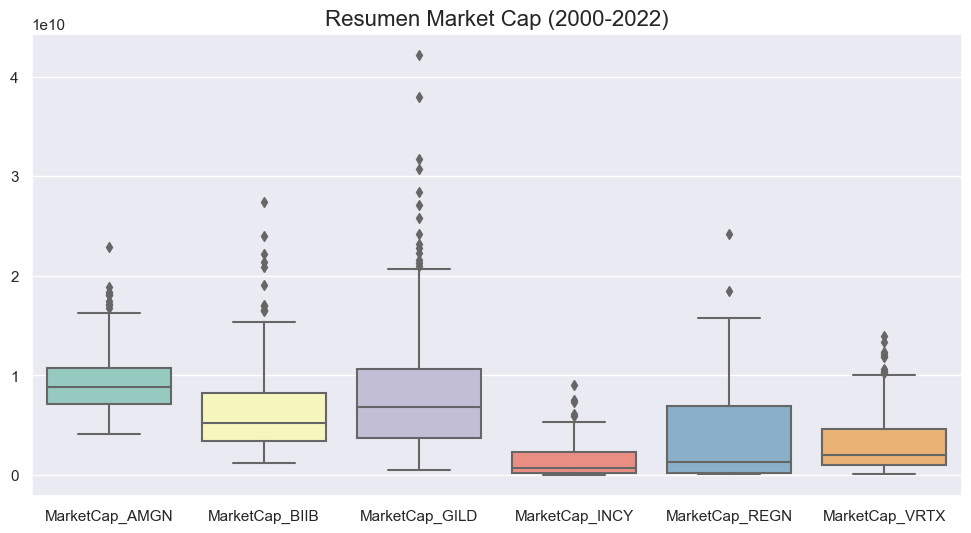

In [548]:
#Visualización de Market Cap en las empresas en el periodo de 20 años 
sns. set (rc = {'figure.figsize':( 12 , 6 )}) 
boxplot= sns.boxplot(data=Market_Cap_Sel, palette= 'Set3')
boxplot.axes.set_title("Resumen Market Cap (2000-2022)", fontsize=16)


In [514]:
#anio_2022= pd.DataFrame(volumenes.iloc[267:279,:].mean())
anio_2020_2022= pd.DataFrame(Market_Cap_Sel.iloc[240:276,:])
anio_2020_2022

#punto_max= Market_Cap_Sel.max()
#punto_max

,MarketCap_AMGN,MarketCap_BIIB,MarketCap_GILD,MarketCap_INCY,MarketCap_REGN,MarketCap_VRTX
Date,,,,,,
2020-01-01 00:00:00-05:00,1.008062e+10,8.457752e+09,1.065802e+10,2.700967e+09,5.455839e+09,6.369207e+09
2020-02-01 00:00:00-05:00,9.067342e+09,1.281293e+10,2.714270e+10,2.212152e+09,1.119245e+10,6.866878e+09
2020-03-01 00:00:00-05:00,1.839720e+10,1.705899e+10,3.800303e+10,3.970619e+09,1.850429e+10,1.334616e+10
2020-04-01 00:00:00-04:00,1.350460e+10,1.388431e+10,4.220966e+10,4.396976e+09,1.239331e+10,1.212784e+10
2020-05-01 00:00:00-04:00,1.179593e+10,8.116573e+09,1.930895e+10,3.353196e+09,2.416855e+10,1.197389e+10
2020-06-01 00:00:00-04:00,1.321630e+10,1.212641e+10,1.574542e+10,3.618312e+09,1.576824e+10,1.185548e+10
2020-07-01 00:00:00-04:00,1.193990e+10,7.189104e+09,1.016008e+10,2.690588e+09,1.061283e+10,8.379966e+09
2020-08-01 00:00:00-04:00,1.330240e+10,7.593610e+09,1.144519e+10,2.225271e+09,8.053759e+09,6.597308e+09
2020-09-01 00:00:00-04:00,1.321193e+10,7.375680e+09,1.116564e+10,2.321753e+09,9.772696e+09,7.608829e+09


/Users/arii/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Últimos años Market Cap (2020-2022)')

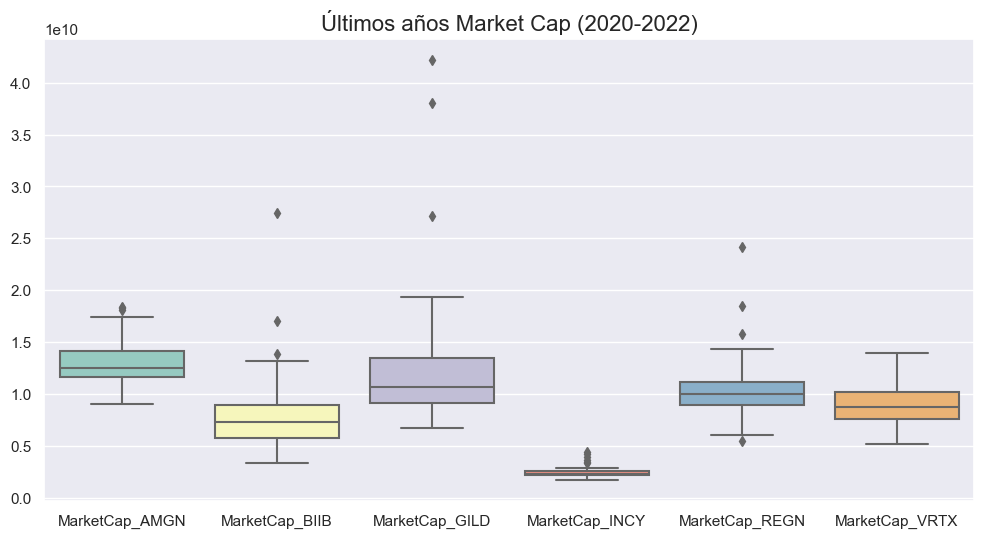

In [547]:
sns.set(rc = {'figure.figsize':( 12 , 6 )}) 
boxplot=sns.boxplot(data=anio_2020_2022, palette= 'Set3')
boxplot.axes.set_title("Últimos años Market Cap (2020-2022)", fontsize=16)



In [528]:
mk.set(xlabel= ['AMGN', 'BIIB', 'GILD', 'INCY','REGN', 'VRTX'], ylabel= 'Market Cap')

[Text(0.5, 0.9709821108951999, "['AMGN', 'BIIB', 'GILD', 'INCY', 'REGN', 'VRTX']"),
 Text(4.444444444444445, 0.5, 'Market Cap')]

/Users/arii/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

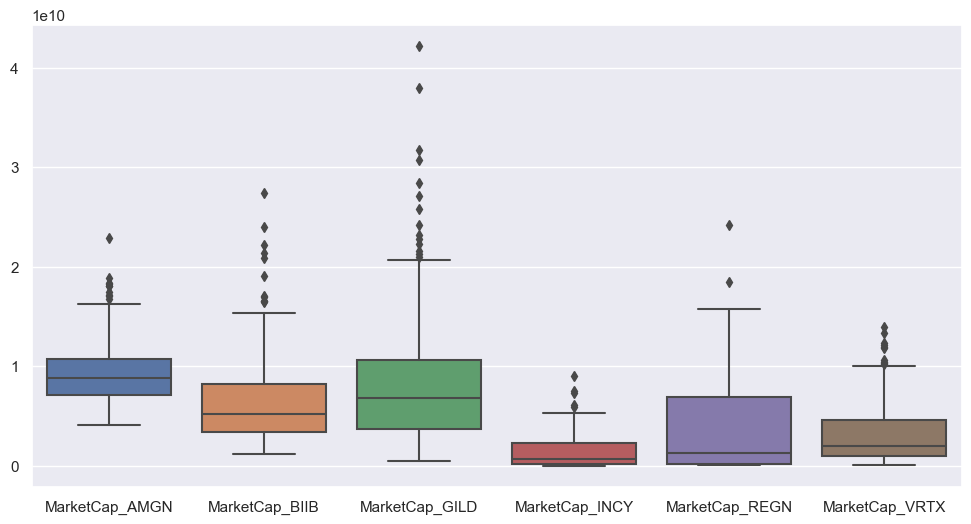

In [542]:

sns. set (rc = {'figure.figsize':( 12 , 6 )}) 
sns.boxplot(data=Market_Cap_Sel)

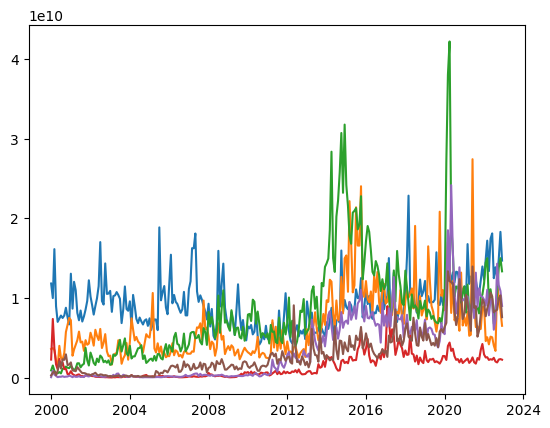

In [504]:
#Visualización de distribución de Market Cap en los 20 años 
plt.plot(Market_Cap_Sel)


__¿Qué día de la semana?__


In [521]:
recolector_3 =[]

for i in empresas:
    ticker= yf.Ticker(i)
    px=ticker.history(period='24y',interval= '1mo')['Volume']
    px.name= i 

    recolector_2 += [px]

volumenes = pd.concat(recolector_2, axis= 1)

volumenes

Date
2023-02-27 00:00:00-05:00    269.200012
2023-02-28 00:00:00-05:00    269.859985
2023-03-01 00:00:00-05:00    272.209991
2023-03-02 00:00:00-05:00    268.750000
2023-03-03 00:00:00-05:00    270.269989
2023-03-06 00:00:00-05:00    270.250000
2023-03-07 00:00:00-05:00    264.880005
2023-03-08 00:00:00-05:00    263.019989
2023-03-09 00:00:00-05:00    258.989990
2023-03-10 00:00:00-05:00    256.559998
2023-03-13 00:00:00-04:00    258.549988
2023-03-14 00:00:00-04:00    262.350006
2023-03-15 00:00:00-04:00    262.369995
2023-03-16 00:00:00-04:00    265.250000
2023-03-17 00:00:00-04:00    263.160004
2023-03-20 00:00:00-04:00    267.910004
2023-03-21 00:00:00-04:00    266.149994
2023-03-22 00:00:00-04:00    261.220001
2023-03-23 00:00:00-04:00    265.170013
2023-03-24 00:00:00-04:00    270.029999
Name: Close, dtype: float64

In [522]:
ultima_semana = pd.DataFrame(px.iloc[13:20,:])


IndexingError: Too many indexers